## Segmentation
Segmentation Subdivides an image into its constituent regions or objects. The level to which the subdivision is carried depends on the problem being solved. That is, segmentation should stop when the objects of interest in an application have been isolated.

Segmentation Algorithms for monochrome images generally are based on one of two basic properties of image intenisty values: **discontinuity** and **similarity**.

**Discontinuity**: In Discontinuity, the approach is to partiion an image based on abrupt changes in the intensity, such as edges in an image.

**Similarity**: In Similarity, the principal approach is based on partitioning an image into regions that are similar according to a set of predefined criteria.

### Point, Line and Edge Detection
The most common way to look for discontinuities is to run a mask through the image. For a 3x3 mask this procedure involves computing the sum of products of the coefficients with the intensity levels contained in the region encompassed by the mask.

That is, the response R of the mask at any point in the image is given by 
\begin{equation*}
R = {w_1}z_1 + w_2^{}z_2 + ... + w_9^{}z_9
\end{equation*}

\begin{equation*}
= \sum\limits_{i = 1}^9 {{w_i}{z_i}}
\end{equation*}

where **z<sub>i</sub>** is the intensity of the pixel associated with mask coefficient **w<sub>i</sub>**.

#### Point Detection
The detection of isolated points embedded in areas of constant or nearly constant intensity in an image is straigthforward in principle. Using the mask showin in the figure below, we say that an isolated point has been detected at the location on which the mask is centered if

\begin{equation*}
|R| \ge T
\end{equation*}

\begin{array}{*{20}{c}}
{ - 1}&{ - 1}&{ - 1}\\
{ - 1}&8&{ - 1}\\
{ - 1}&{ - 1}&{ - 1}
\end{array}

where **T** is non-negative Threshold.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Input Image')

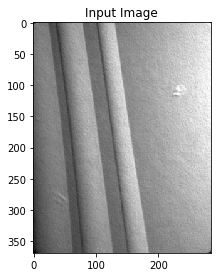

In [2]:
# Reading the image
image = cv.imread("assets/pointThreshold.JPG")
image_copy = np.copy(image)
image_gray = cv.cvtColor(image_copy, cv.COLOR_RGB2GRAY)
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(image_gray, cmap="gray")
axes.set_title("Input Image")

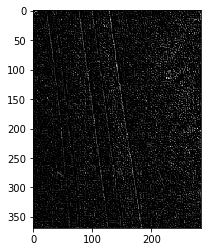

In [3]:
# 3x3 array for point detection
mask = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]
                ])

filtered_image = cv.filter2D(image_gray, -1, mask)
# -1 means output will have same type as input image
plt.imshow(filtered_image, cmap="gray")

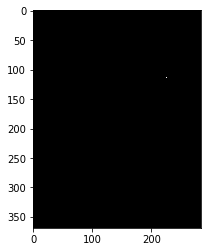

In [4]:
retval, binary_image = cv.threshold(filtered_image, 160, 255, cv.THRESH_BINARY)
plt.imshow(binary_image, cmap="gray")

### Line Detection


In [5]:
horizontal_mask = np.array([
    [-1, -1, -1],
    [2, 2, 2],
    [-1, -1, -1]
])

pos_45_mask = np.array([
    [-1, -1, 2],
    [-1, 2, -1],
    [2, -1, -1]
])

vertical_mask = np.array([
    [-1, 2, -1],
    [-1, 2, -1],
    [-1, 2, -1]
])

neg_45_mask = np.array([
    [2, -1, -1],
    [-1, 2, -1],
    [-1, -1, 2]
])

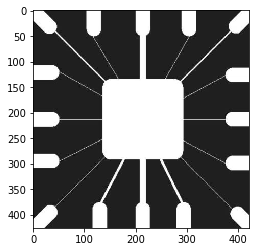

In [6]:
line_seg_image = cv.imread("assets/lineSegmentation.JPG")
line_seg_image_copy = np.copy(line_seg_image)
line_seg_image_gray = cv.cvtColor(line_seg_image, cv.COLOR_BGR2GRAY)
plt.imshow(line_seg_image_gray, cmap="gray")

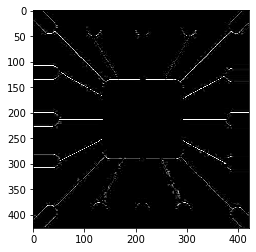

In [7]:
filtered_hor_image = cv.filter2D(line_seg_image_gray, -1, horizontal_mask)
plt.imshow(filtered_hor_image, cmap="gray")

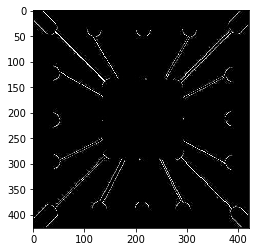

In [8]:
filtered_neg_45_image = cv.filter2D(line_seg_image_gray, -1, neg_45_mask)
plt.imshow(filtered_neg_45_image, cmap="gray")

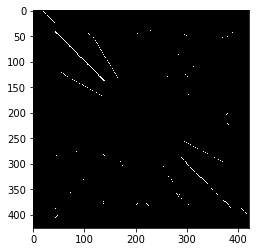

In [9]:
retval, binary_neg_45_image = cv.threshold(filtered_neg_45_image, 254, 255, cv.THRESH_BINARY)
plt.imshow(binary_neg_45_image, cmap="gray")

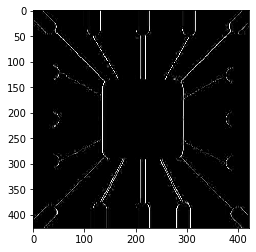

In [10]:
filtered_ver_image = cv.filter2D(line_seg_image_gray, -1, vertical_mask)
plt.imshow(filtered_ver_image, cmap="gray")

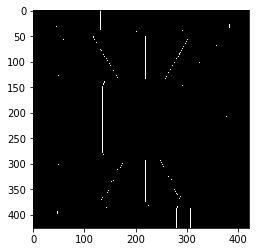

In [11]:
retval, binary_ver_image = cv.threshold(filtered_ver_image, 254, 255, cv.THRESH_BINARY)
plt.imshow(binary_ver_image, cmap="gray")

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

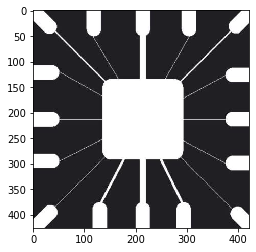

In [13]:
im = cv.imread("assets/lineSegmentation.JPG")
im_copy = np.copy(im)
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
plt.imshow(im, cmap="gray")

In [14]:
saatTale_durbar = cv.imread("assets/edgeSaattale.jfif")

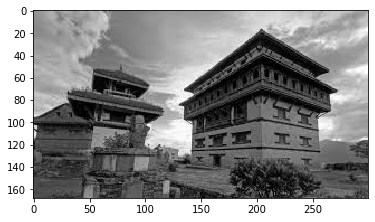

In [15]:
saatTale_gray = cv.cvtColor(saatTale_durbar, cv.COLOR_BGR2GRAY)
plt.imshow(saatTale_gray, cmap="gray")

### Edge Detection


In [16]:
roberts_x = np.array([
    [-1, 0],
    [0, 1]
])

roberts_y = np.array([
    [0, -1],
    [1, 0]
])

Text(0.5, 1.0, 'Roberts Y')

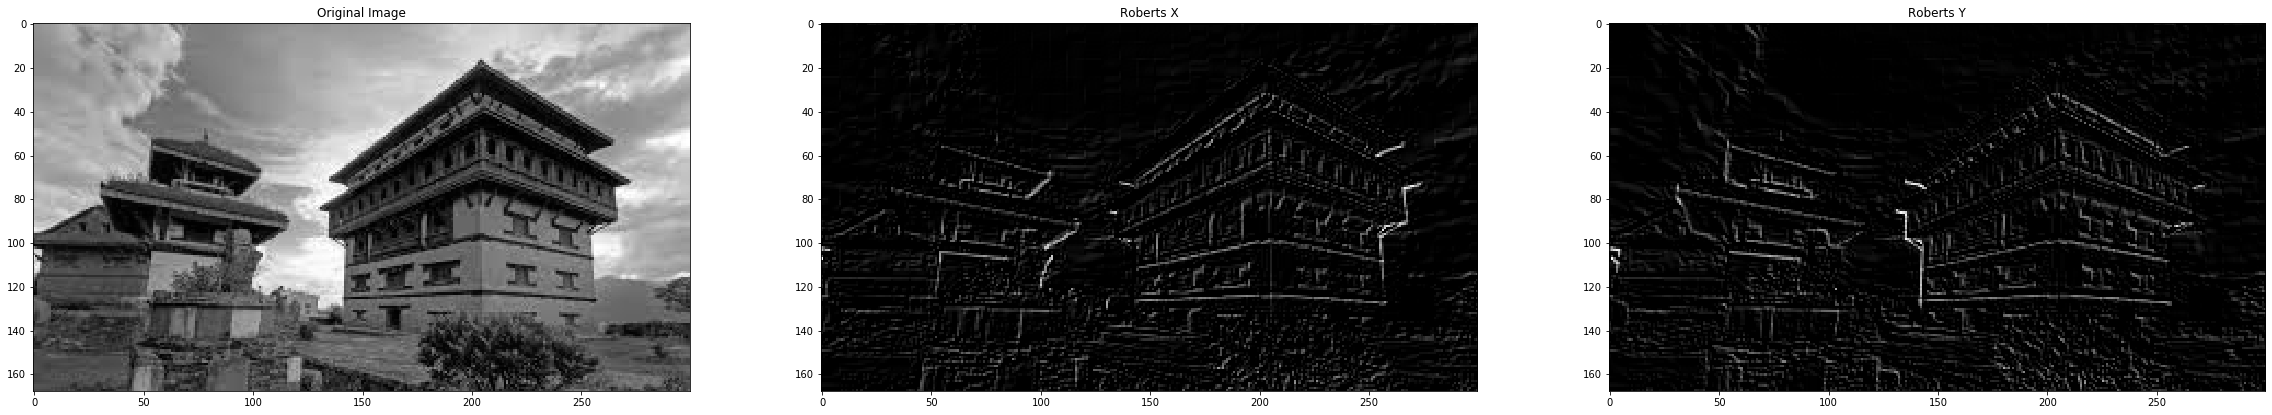

In [17]:
saatTale_filtered_roberts_x = cv.filter2D(saatTale_gray, -1, roberts_x)
saatTale_filtered_roberts_y = cv.filter2D(saatTale_gray, -1, roberts_y)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(40,40))
axes[0].imshow(saatTale_gray, cmap="gray")
axes[0].set_title("Original Image")
axes[1].imshow(saatTale_filtered_roberts_x, cmap="gray")
axes[1].set_title("Roberts X")
axes[2].imshow(saatTale_filtered_roberts_y, cmap="gray")
axes[2].set_title("Roberts Y")

In [18]:
sobel_x = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

sobel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

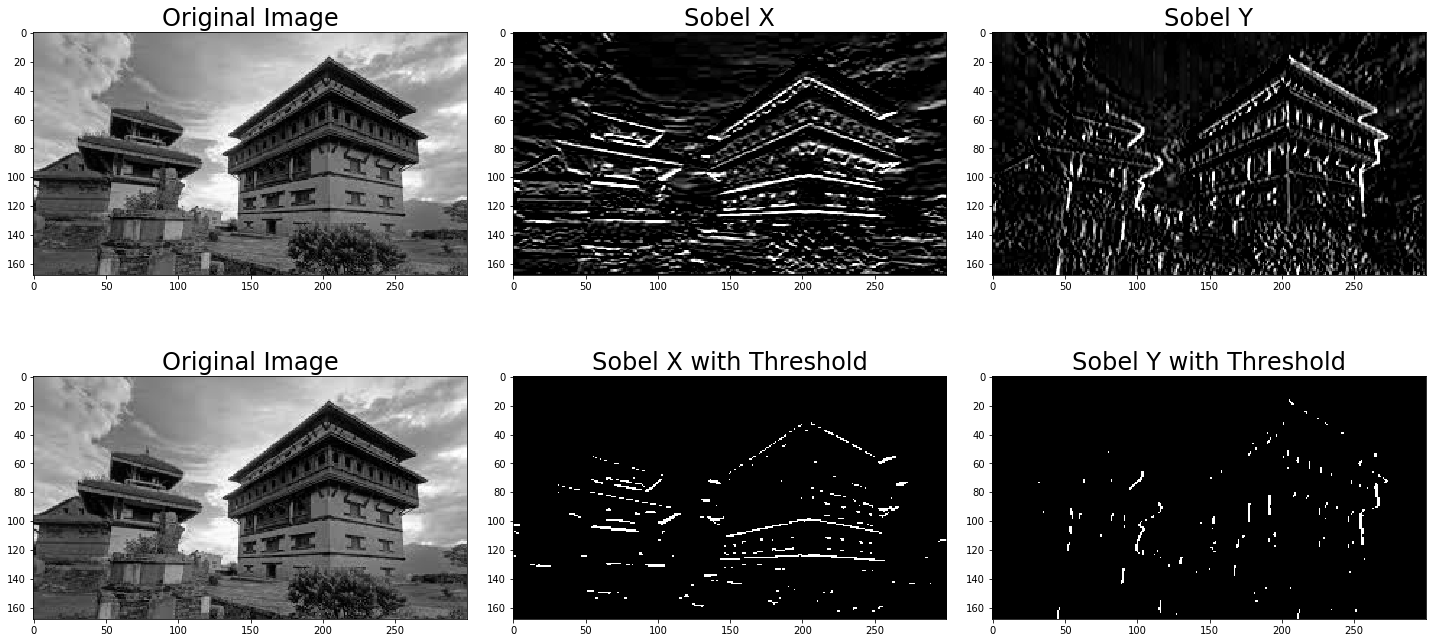

In [19]:
saatTale_filtered_sobel_x = cv.filter2D(saatTale_gray, -1, sobel_x)
saatTale_filtered_sobel_y = cv.filter2D(saatTale_gray, -1, sobel_y)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

axes[0][0].imshow(saatTale_gray, cmap="gray")
axes[0][0].set_title("Original Image", fontsize=24)

axes[0][1].imshow(saatTale_filtered_sobel_x, cmap="gray")
axes[0][1].set_title("Sobel X", fontsize=24)

axes[0][2].imshow(saatTale_filtered_sobel_y, cmap="gray")
axes[0][2].set_title("Sobel Y", fontsize=24)

axes[1][0].imshow(saatTale_gray, cmap="gray")
axes[1][0].set_title("Original Image", fontsize=24)

retval, saatTale_binary_sobel_x = cv.threshold(saatTale_filtered_sobel_x, 
                                        254, 255, cv.THRESH_BINARY)

axes[1][1].imshow(saatTale_binary_sobel_x, cmap="gray")
axes[1][1].set_title("Sobel X with Threshold", fontsize=24)

retval, saatTale_binary_sobel_y = cv.threshold(saatTale_filtered_sobel_y, 
                                        254, 255, cv.THRESH_BINARY)

axes[1][2].imshow(saatTale_binary_sobel_y, cmap="gray")
axes[1][2].set_title("Sobel Y with Threshold", fontsize=24)

fig.tight_layout(w_pad=2)

In [20]:
prewitt_x = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

prewitt_y = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

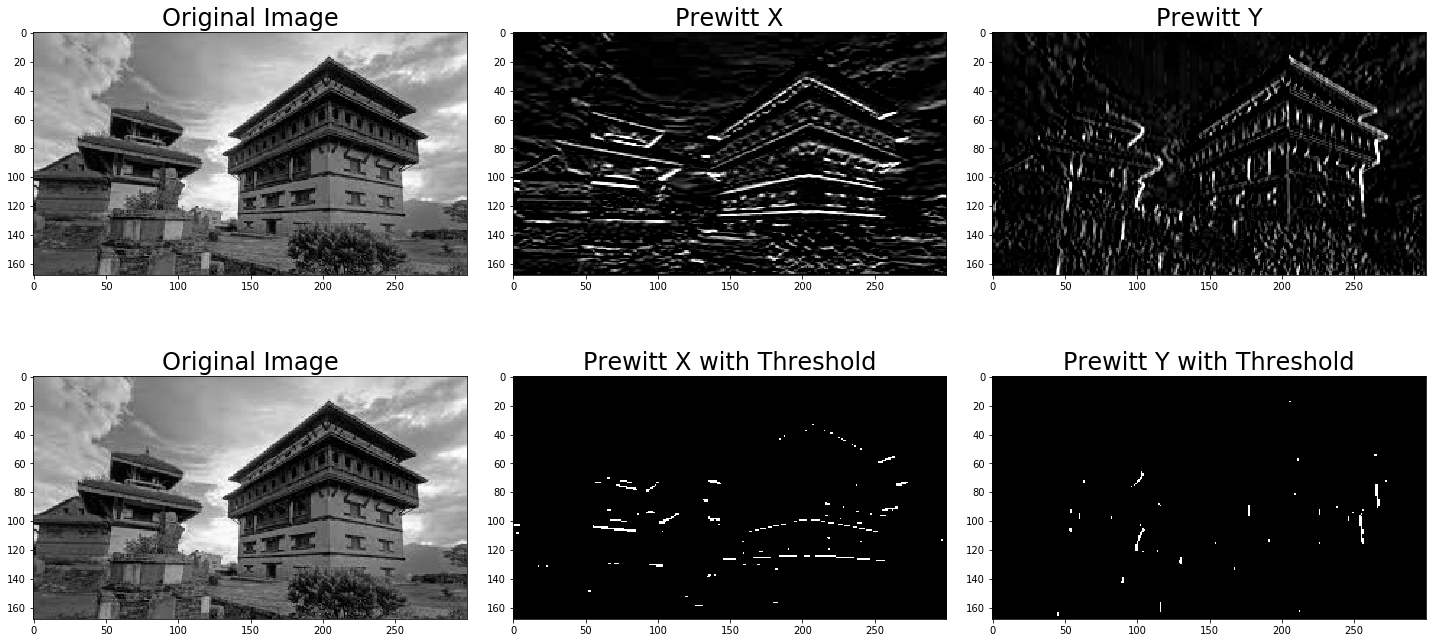

In [21]:
saatTale_filtered_prewitt_x = cv.filter2D(saatTale_gray, -1, prewitt_x)
saatTale_filtered_prewitt_y = cv.filter2D(saatTale_gray, -1, prewitt_y)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

axes[0][0].imshow(saatTale_gray, cmap="gray")
axes[0][0].set_title("Original Image", fontsize=24)

axes[0][1].imshow(saatTale_filtered_prewitt_x, cmap="gray")
axes[0][1].set_title("Prewitt X", fontsize=24)

axes[0][2].imshow(saatTale_filtered_prewitt_y, cmap="gray")
axes[0][2].set_title("Prewitt Y", fontsize=24)

axes[1][0].imshow(saatTale_gray, cmap="gray")
axes[1][0].set_title("Original Image", fontsize=24)

retval, saatTale_binary_prewitt_x = cv.threshold(saatTale_filtered_prewitt_x, 
                                        250, 255, cv.THRESH_BINARY)

axes[1][1].imshow(saatTale_binary_prewitt_x, cmap="gray")
axes[1][1].set_title("Prewitt X with Threshold", fontsize=24)

retval, saatTale_binary_prewitt_y = cv.threshold(saatTale_filtered_prewitt_y, 
                                        250, 255, cv.THRESH_BINARY)

axes[1][2].imshow(saatTale_binary_prewitt_y, cmap="gray")
axes[1][2].set_title("Prewitt Y with Threshold", fontsize=24)

fig.tight_layout(w_pad=2)

In [42]:
# Laplacian Filters

laplacian_filter = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

hyperbolic_filter = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

In [40]:
coins_image = cv.imread("assets/coin.jpg")
coins_gray = cv.cvtColor(coins_image, cv.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Filtered Hyperbolic with Threshold')

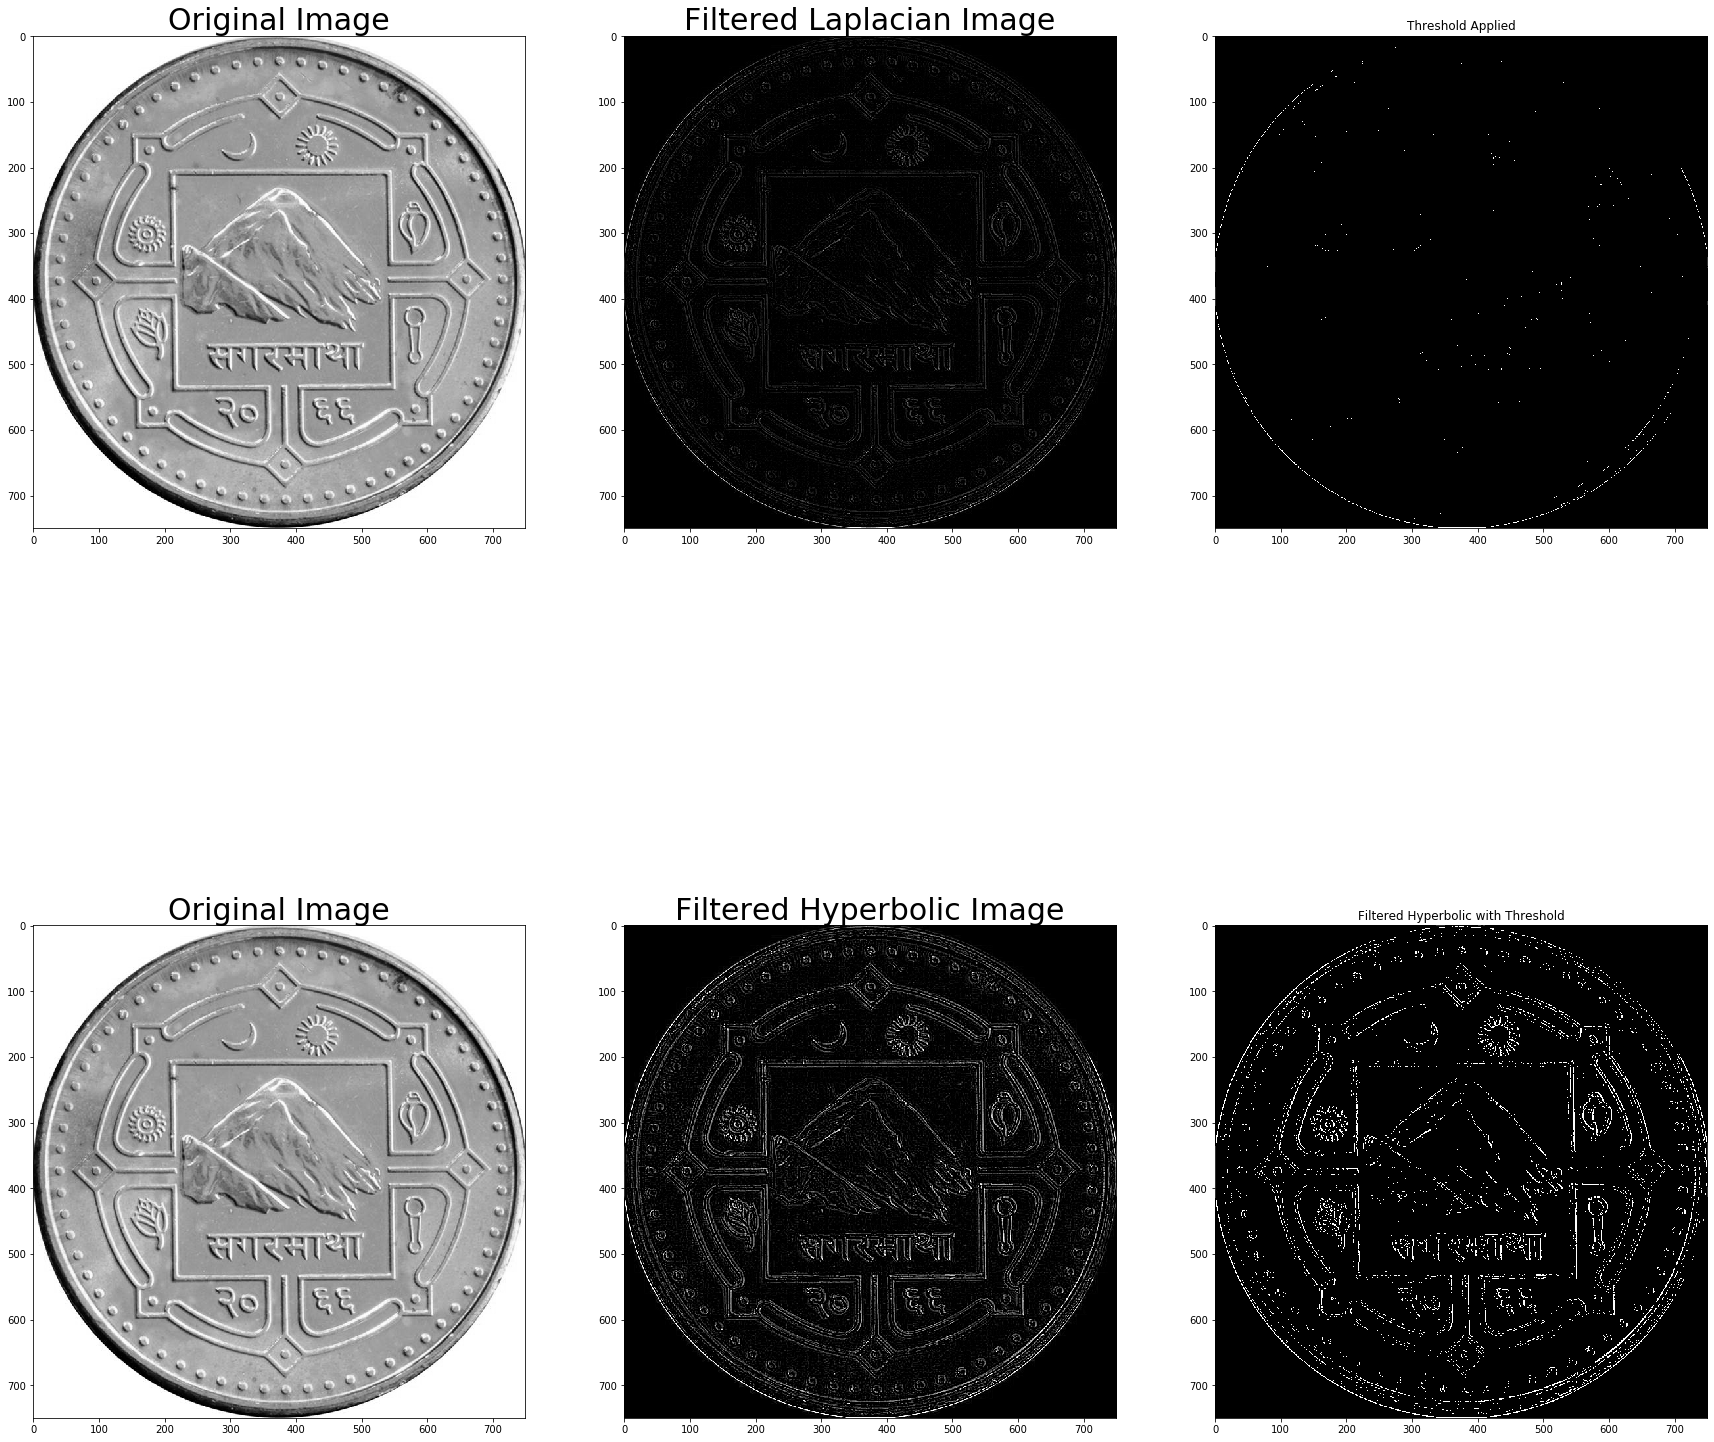

In [59]:
coins_laplacian = cv.filter2D(coins_gray, -1, laplacian_filter)
retval, coins_laplacian_threshold = cv.threshold(coins_laplacian, 100, 255, cv.THRESH_BINARY)

coins_hyperbolic = cv.filter2D(coins_gray, -1, hyperbolic_filter)
retval, coins_hyperbolic_threshold = cv.threshold(coins_hyperbolic, 100, 255, cv.THRESH_BINARY)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30,30))

ax[0][0].imshow(coins_gray, cmap="gray")
ax[0][0].set_title("Original Image", fontsize=30)
ax[0][1].imshow(coins_laplacian, cmap="gray")
ax[0][1].set_title("Filtered Laplacian Image", fontsize=30)
ax[0][2].imshow(coins_laplacian_threshold, cmap="gray")
ax[0][2].set_title("Threshold Applied")

ax[1][0].imshow(coins_gray, cmap="gray")
ax[1][0].set_title("Original Image", fontsize=30)
ax[1][1].imshow(coins_hyperbolic, cmap="gray")
ax[1][1].set_title("Filtered Hyperbolic Image", fontsize=30)
ax[1][2].imshow(coins_hyperbolic_threshold, cmap="gray")
ax[1][2].set_title("Filtered Hyperbolic with Threshold")

## Thresholding

### Single Value Thresholding


In [2]:
card = cv.imread("assets/cards.png")
card_gray = cv.cvtColor(card, cv.COLOR_BGR2GRAY)

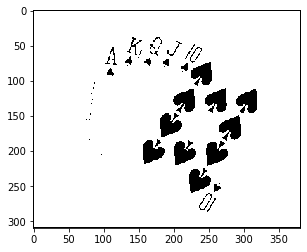

In [35]:
retval, thresholded_card = cv.threshold(card_gray, 85, 255, cv.THRESH_BINARY)
plt.imshow(thresholded_card, cmap="gray")

In [37]:
hist, edges = np.histogram(card_gray, bins=range(255))

<BarContainer object of 254 artists>

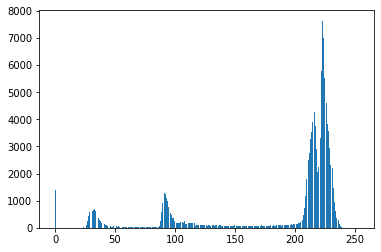

In [27]:
plt.bar(edges[:-1], hist, width=0.8)

In [45]:
accepted_error = 0.2

def globalThreshold(image):
    initial_t = np.floor(np.average(image))
    seg_1 = image[image>initial_t]
    seg_2 = image[image<=initial_t]
    
    mu_seg_1 = np.floor(np.average(seg_1))
    mu_seg_2 = np.floor(np.average(seg_2))
    
    avg_t = (mu_seg_1 + mu_seg_2)/2
    
    
    return avg_t

In [47]:
globalThreshold(card_gray)

152.5